# Microsoft needs analysis


# Overview

This project analyzes the resource needs of Microsoft.
Microsoft has decide to create a new movie studio and therefore
through explanatory data analysis we will help microsoft decide
the best movies genres to create.

# Business Problem

Micorost may be able to enter the video content industry successfully
by using the findings on the type of video content people prefer
and creating films related to the genre.
This findings will specifically be helpful to the new head of the
movie studio

# Data understanding

Box Office Mojo and IMDB contai movie datasets that can be able 
to provide helpful insights. They contain the various types of 
movies and their ratings.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
bom_movies_gross = pd.read_csv ("bom.movie_gross.csv")
bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [74]:
bom_movies_gross.shape

(3387, 5)

# Data preparation

In this step we will begin by checking for missing values in the dataset

In [75]:
bom_movies_gross.isnull().values.any()

True

We then find the total number of missing values by column

In [76]:
bom_movies_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

To then help us futher understand the data we find and plot the missing values by column

In [35]:
percent_missing = bom_movies_gross.isnull().sum() * 100 /len(bom_movies_gross)
percent_missing

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Our next step will be to drop all the missing values in our rows

In [78]:
bom_movies_gross.dropna(axis=0, inplace = True)

To confirm if the values were dropped we use the code cell below

In [79]:
bom_movies_gross.isnull().values.any()

False

Our next step is todrop all the duplicate values from our data set

In [47]:
bom_movies_gross = bom_movies_gross.drop_duplicates()

# Data analysis

show the statistics of our data frame

In [46]:
bom_movies_gross.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


In [68]:
bom_movies_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [82]:
#We want to see the top ten movies with the highest domestic gross

In [92]:
op_ten_domestic=bom_movies_gross.nlargest(10,"domestic_gross")[["title","domestic_gross"]].set_index("title")
top_ten_domestic

,domestic_gross
title,
Star Wars: The Force Awakens,936700000.0
Black Panther,700100000.0
Avengers: Infinity War,678800000.0
Jurassic World,652300000.0
Marvel's The Avengers,623400000.0
Star Wars: The Last Jedi,620200000.0
Incredibles 2,608600000.0
Rogue One: A Star Wars Story,532200000.0
Beauty and the Beast (2017),504000000.0


# Visualization

Top help microsft CEO easily understand our data we we will create a visualization of the top 20 movies with the highest domestic revenue

C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Movies with the highest domestic gross')]

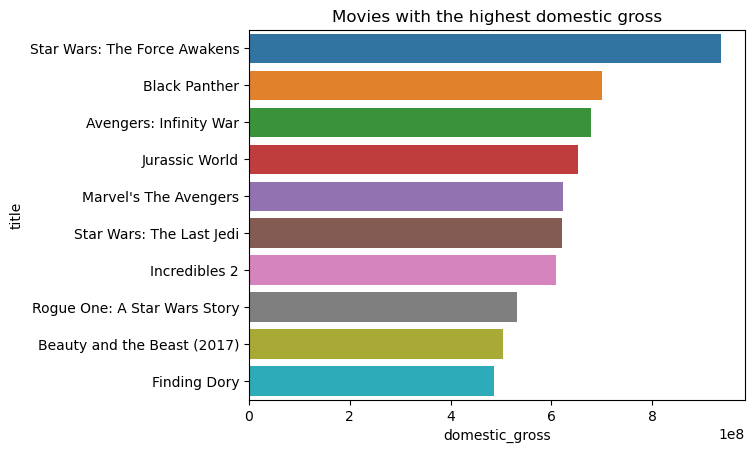

In [86]:
sns.barplot(x="domestic_gross", y=top_ten_domestic.index,data=top_ten_domestic).set(title="Movies with the highest domestic gross")

We could also plot a histogram of the same data

C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Movies with the highest domestic gross')]

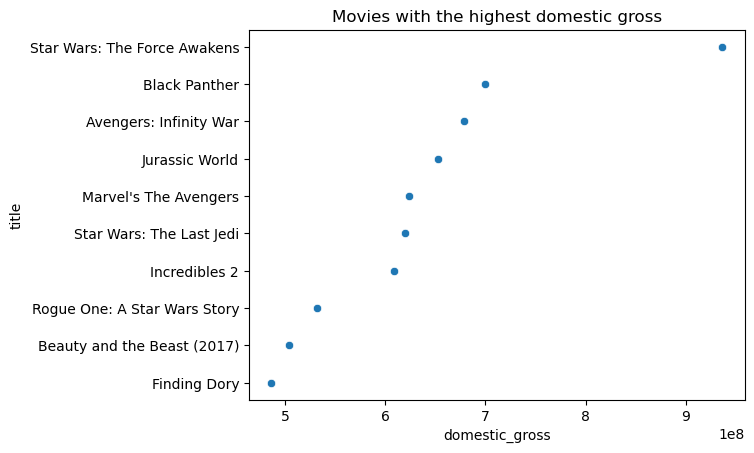

In [112]:
sns.scatterplot(x="domestic_gross", y=top_ten_domestic.index,data=top_ten_domestic).set(title="Movies with the highest domestic gross")

C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ian\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

[Text(0.5, 1.0, 'Movies with the highest domestic gross')]

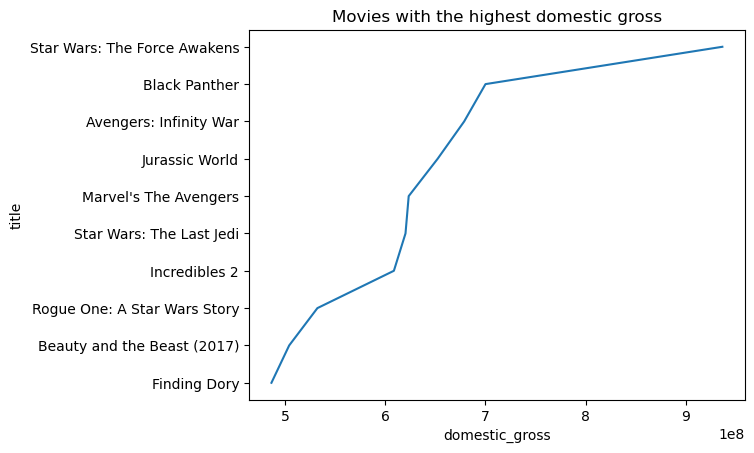

In [119]:
sns.lineplot(x="domestic_gross", y=top_ten_domestic.index,data=top_ten_domestic).set(title="Movies with the highest domestic gross")